In [1]:
import numpy as np
from math import sin, cos, pi
import matplotlib.pyplot as plt
from numba import jit

In [2]:
#@jit
def LagrangeInterpolation(point, X, Y):
    xp = point
    yp = 0
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * (xp - X[j])/(X[i] - X[j])
        yp = yp + p * Y[i]
        
    return yp

In [27]:
function = '(2+x**2+10*cos(x))/(10+x)'
n = 25
a = 0
b = 10

In [68]:
from scipy.misc import derivative
def f(x):
    return (2+x**2+10*cos(x))/(10+x)
derivative(f, 5.0, dx=1e-6, n=10, args=(), order=111)

-1.6530801006980307e+43

Для равномерного распределения интерполяционных узлов

In [31]:
F = np.zeros(n, dtype=np.float64)
X = np.linspace(a, b, num = n)
for idx, x in np.ndenumerate(X):
    F[idx] = eval(function)

In [32]:
newX = np.linspace(a - (b-a)/n, b + (b-a)/n, num = n, dtype=np.float64)
iF = np.zeros(n, dtype=np.float64)
newF = np.zeros(n, dtype=np.float64)
serror = 0
for idx, x in np.ndenumerate(newX):
    iF[idx] = LagrangeInterpolation(newX[idx], X, F)
    newF[idx] = eval(function)
    serror = abs((iF[idx] - newF[idx])/iF[idx])
avgerr = serror / (n * 10)
print('ошибочка вышла:', avgerr)

ошибочка вышла: 7.400047425886963e-12


Для Чебышевского распределения интерполяционных узлов

In [33]:
F = np.zeros(n, dtype=np.float64)
X = np.zeros(n, dtype=np.float64)
for k in range(0, 2 * n, 2):
    X[int(k/2)] = (a + b) / 2 + (b - a) / 2 * cos((2 * k - 1)/(2 * n) * pi)
X.sort()
for idx, x in np.ndenumerate(X):
    F[idx] = eval(function)

In [36]:
newX = np.linspace(a - (b-a)/n, b + (b-a)/n, num = n, dtype=np.float64)
iF = np.zeros(n, dtype=np.float64)
newF = np.zeros(n, dtype=np.float64)
serror = 0
Rn = np.zeros(n, dtype=np.float64)
for idx, x in np.ndenumerate(newX):
    iF[idx] = LagrangeInterpolation(newX[idx], X, F)
    newF[idx] = eval(function)
    serror = abs((iF[idx] - newF[idx])/iF[idx])
avgerr = serror / (n * 10)
print('ошибочка вышла:', avgerr)

ошибочка вышла: 2.7957215009125e-15


In [38]:
Rn = np.abs(iF - newF)
Rn

array([2.50222065e-12, 1.11022302e-15, 6.66133815e-16, 1.11022302e-16,
       4.44089210e-16, 1.66533454e-16, 6.24500451e-17, 1.70002901e-16,
       2.77555756e-17, 3.33066907e-16, 7.77156117e-16, 2.22044605e-16,
       1.11022302e-15, 8.88178420e-16, 8.88178420e-16, 1.77635684e-15,
       4.44089210e-16, 4.44089210e-16, 2.22044605e-15, 1.33226763e-15,
       0.00000000e+00, 3.10862447e-15, 8.88178420e-16, 2.66453526e-15,
       3.58202357e-12])

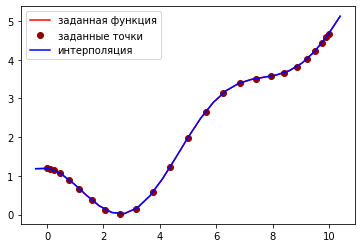

In [35]:
plt.plot(newX, newF, color='red', label='заданная функция')
plt.plot(X, F, color='#8b0000', marker='o', linewidth=0, label='заданные точки')
plt.plot(newX, iF, 'blue', label='интерполяция')
plt.legend()
plt.show()